# Notes

### Quantum version of k-nearest neighbour method

* Pattern classification using k-nearest neighbour algorithm 

* Given some training set $\large{\tau}$ of feature vectors along with their corresponding classifications, and an unlassified input vector $\vec{x}$, we can choose a classification for the input vector that appears most among its k-nearest neighbours. 

* Works by minimizing a "distance", this can be using a Euclidean distance, the inner product and the hamming distance (encode vectors by using bit strings, the hamming distance is the number of flips needed to get from one bit string representation of a vector to another) 

![schuld et al](Images/schuld_et_al.PNG)

* Overlap or fidelity $|\langle a | b\rangle| $ of two quantum states $|a\rangle$ and $|b\rangle$ as a 'similarity measure'. Fidelity can be optained through a swap test. 

* Take a quantum state $|a,b 0_{anc}\rangle $ , we use Hadammard gate on the Ancilla qubit, then a controlled SWAP gate on a and b (swap if ancilla is in $|1\rangle$. Then use a second Hadamard gate on the ancilla and we get 

$$ |\psi_{swap}\rangle = \frac{1}{2}|0\rangle(|a,b\rangle + |b,a\rangle) +\frac{1}{2}|1\rangle(|a,b\rangle - |b,a\rangle) $$ 

Finding the anilla qubit in the ground state has probability, 

$$ P(|0_{anc}\rangle) = \frac{1}{2} + \frac{1}{2}|\langle a | b\rangle|^2 $$

getting $\frac{1}{2}$ shows that we have orthogonal states and getting $1$ says we have equaivalent states which means we have maximum overlap. 

# What is Machine Learning 

Machine Learning is most widely used for pattern finding and classification,  Given some training set $\large{\tau}$ of feature vectors along with their corresponding classifications, and an unlcassified input vector $\vec{x}$ how do we classify this input vector? These are the type of questions we want to answer. 

A feature vector is a vector that contains data realted to features of the data set. For example if we were talking about a data set with cars, features could be make and model and year. A feature vector could be something like ['Honda' , 'Pilot' , 2015]. Using more data about the vehicle a Machine learning algorithm can see that a picture of a Honda Pilot has some values for certain features and hopefully become better at distinguishing the Honda Pilot from other vehicles. Even more simply we can use things like weight or size to classify input vectors as cars and not tanks (assuming we are looking at tanks that are bigger and heavier than cars this is just an example of how there are features that are potentially more useful than others).




# Variatonal Circuts 

### Ever changing quantum circuits 

Paramterized circuits, also known as variational circuits, are quantum circuits with tunable variables. 

How they work is that we set up a circuit in some state of a Unitary Operator , lets call it $U(\theta)$. This prepares the circuit in some state which is dependent on $\theta$, we then take a measurement and use this value to adjust theta and use this new value to feed into a new quatnum circuit. This is very similar to how Gradient Descent in machine learning algorithms work, we tune parameters to minimize a "cost" function, in this case the measurement of our quantum circuit is out "cost". (Cost is a fancy way to say how off we are from a desired result, getting something absolutely wrong would have a high cost, getting exactly correct would have a cost of 0)

### Building our circuits 

We essentially want to turn classical information, tunable variable(s) like $\theta$ into Quantum information by using some operator on a state, encoding the classical information into a quantum state! 

We sometimes have other non-changing values like $x = (x_1, x_2, x_3 ...)$ as well that we want to input. This would just make our Operator a function of $x$ and $\theta$, $U(x;\theta)$.

We get classical information back from our circuit by taking the expectation value of some observable. (Literally anything we can call it $\hat{A}$. Expectation value to get a cost function $f(x;\theta)$ would look like this, 

$$ f(x;\theta) = \langle 0 | U(x;\theta)^{\large{\dagger}} \hat{A} U(x;\theta) |0\rangle$$ 

We aim to optimize this expectation value or "cost" with respect to $\theta$ as mentioned before. For example if our operator $\hat{A}$ is the Hamiltonian of the system (total energy), then we can approximate ground states by minimizing the expectation value above. 

Other Optimization methods need us to approximate the gradient at every single iteration of our variational circuit, other optimizations that are from compicated need high order derivatives. 

## Gradeint descent and how to update paramters

We can update $\theta$ by using a common Machine Learning algorithm known as gradient descent. Essentially we take our cost function and take its gradient (derivative) with respect to the parameter we want to change ($\theta$) and then subtract that from the current value of theta (mutliplied by a learning rate $\eta$ which is usually a very small number). 

The Gradeint descent looks like this, 

$$ \theta_{n} = \theta_{n-1} - \eta \nabla_\theta f(\theta_{n-1}) $$

We use the parameter shift rule to find an easy gradient of our expectation value (cost) $f(\theta)$, 

We can write out our expression from before ( we only care about $\theta$ for our purposes, 

$$ f(\theta) = \langle 0 | U(\theta)^{\large{\dagger}} \hat{A} U(\theta) |0\rangle$$ 

and we can express $U(\theta)$ in an exponential form since it is a unitary gate, 

$$U(\theta) = e^{ia\theta\hat{V}}$$

Here $\hat{V}$ is a Hermitian Generator of our gate $U(\theta)$.

The parameter shift rule tells us that if a generator of a gate ($\hat{V}$), only has two unique eigenvalues $\lambda_1$, $\lambda_2$, then the derivative of $f(\theta)$ is proportional to the difference in expectation values of two new circuits that have their parameters shifted by $\frac{\pi}{4r},\frac{-\pi}{4r}$. 

Explicitly, 

$$ \nabla_\theta f(\theta) = r [f(\theta + \frac{\pi}{4r}) - f(\theta - \frac{\pi}{4r})]$$

the shift constant r is mostly convention, but could be explicity chosen from the eigenvalues by using,

$$r=\frac{a}{2}(\lambda_2 - \lambda_1 )$$ 

For many operators just using $r=\frac{1}{2}$ works out fine so we do not have to worry about that part too much. Our shifts become $\frac{\pi}{2},\frac{-\pi}{2}$.




## Problem 

Can we use gradient descent to set paramters for operators to make sure we get certain probability or state as a result of our circuit?


## Imports (there is a new one!)


In [108]:
# Do not forget to Import Qiskit 

from qiskit.visualization import * 
from qiskit import *

S_simulator=Aer.backends(name='statevector_simulator')[0] 
M_simulator=Aer.backends(name='qasm_simulator')[0] 

# new import allows us to use CircuitOP() and CircuitStateFn() as well as operators I,X,Y,Z etc.

from qiskit.aqua.operators import *
from qiskit.quantum_info import random_unitary

### How do we take expectation values in Python! H gate example

There are some good tricks we can do we can convert operators and circuits into operators and wavefunctions, we can use CircuitOp() and CricuitStateFn() to do so.

lets see an example with the Hadammard gate! 

In [116]:
op=QuantumCircuit(1) # make an operator circuit, and turn it into an operator! DO NOT add a classical bit

op.h(0)

op =CircuitOp(op)

psi = QuantumCircuit(1) # make a wavefunction circuit. 

psi=CircuitStateFn(psi)

# psi is our ket and we can use psi.adjoint() to get its complext conjugate, the bra 

# so to do an expectation value of <psi| H |psi> we just do psi.adjoint() on H |psi> this can be done in the following way

print('expectation value: ', psi.adjoint().compose(op).compose(psi).eval().real)

expectation value:  0.7071067811865476


### More complicated oeprators H2 Hamiltonian Example

The import of qiskit.aqua.operators lets us call our basic operators by I, X, Y, Z etc. 

We can use that to define the hamilitonian of diatomic Hydrogen! Great stack exchange answer provided by Cryoris
[here](https://quantumcomputing.stackexchange.com/questions/12080/evaluating-expectation-values-of-operators-in-qiskit).

I am actually unsure if the hamiltonian is correct this is more so an example to shopw that we can use mroe complicated operators. 

In [43]:
op =  (-1.0523732 * I^I) + (0.39793742 * I^Z) + (-0.3979374 * Z^I) \
    + (-0.0112801 * Z^Z) + (0.18093119 * X^X)
psi = QuantumCircuit(2)
psi.x(0) 
psi.x(1) 

psi=CircuitStateFn(psi)
print('expectation value: ', psi.adjoint().compose(op).compose(psi).eval().real) 

expectation value:  -1.0636533199999998


# Setting up our problem 

So now we can have our algorithm, we have a way to calculate a gradient and a way to take an expectation value to find our cost fucntion to get a gradient. 

Lets pretend to use a random unitary matrix as a pretend hamiltonian for some system and minimize that to find the ground state. 


In [129]:
# Try to follow along a problem from a paper [1]

# construct a circuit with 5 parameters. 

from random import uniform 
from math import pi

thetas = []
n=5

for i in range(n): 
    
    thetas.append(uniform(0,2*pi))

theta1 = thetas[0]

theta2 = thetas[1]

theta3 = thetas[2]

theta4 = thetas[3]

theta5 = thetas[4]

print('starting thetas: ', thetas)

# these random thetas are the starting values for our rotation operators


starting thetas:  [0.6457574481996964, 3.363282012748121, 4.9023225339127565, 1.3839620579899377, 4.807211745029281]


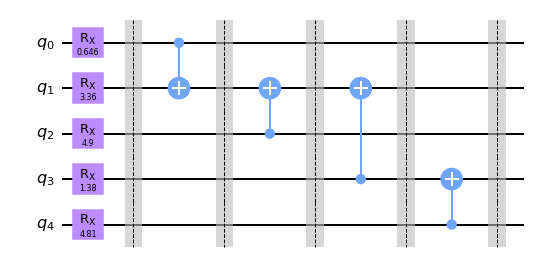

In [141]:
variational_circuit=QuantumCircuit(5)

#rotations that are dependent on theta
variational_circuit.rx(theta1, 0)
variational_circuit.rx(theta2, 1)
variational_circuit.rx(theta3, 2)
variational_circuit.rx(theta4, 3)
variational_circuit.rx(theta5, 4)

variational_circuit.barrier()


#entangling block (dont worry too much)

variational_circuit.cx(0,1)

variational_circuit.barrier()

variational_circuit.cx(2,1)

variational_circuit.barrier()

variational_circuit.cx(3,1)

variational_circuit.barrier()

variational_circuit.cx(4,3)

variational_circuit.barrier()


variational_circuit.draw(output='mpl')

This circuit we constructed is our $U(\theta)$ we can turn this into an operator using code from above

In [142]:
U = CircuitOp(variational_circuit)

Our observable that we will measure will just be the Pauli-Z gate! (following a paper's convention I will just use Z on the second qubit) 

In [144]:
Z = QuantumCircuit(5)

Z.z(1)

Z = CircuitOp(Z)

In [146]:
# we can easily find the complex conjugate of the U 

In [145]:
U_dag = U.adjoint()

Reminder of our equations, 

$$ f(\theta) = \langle 0 | U(\theta)^{\large{\dagger}} Z U(\theta) |0\rangle$$ 

$$ \nabla_\theta f(\theta) = \frac{1}{2} [f(\theta + \frac{\pi}{2}) - f(\theta - \frac{\pi}{2})]$$

before calculating the gradient we can create wavefucntions that are in the 0 state like we did above in our example

In [147]:
psi = QuantumCircuit(5) # make a wavefunction circuit. 

psi=CircuitStateFn(psi)


We edit our code by using more compose() to find expectation values

In [149]:
print('expectation value: ', 
psi.adjoint().compose(U_dag).compose(Z).compose(U).compose(psi).eval().real) 

expectation value:  -0.027321660520389934


Now we can find the shifted expectation values to find the gradient

$\nabla_\theta f(\theta)$ by adding $\pi/2$ and $-\pi/2$ to the thetas and taking 2 expectation values seperately and taking their difference. This is much easier if we can wrap our circuit in a function that takes theta as a variable. Then another function that makes our operators for us. Another function that will take expectation values for us, and a final function that can hopefully run our algorithm for us. 

In [175]:
def make_variational_circuit(thetas): 
    
    theta1 = thetas[0]

    theta2 = thetas[1]

    theta3 = thetas[2]

    theta4 = thetas[3]

    theta5 = thetas[4]
    
    variational_circuit=QuantumCircuit(5)

    #rotations that are dependent on theta
    variational_circuit.rx(theta1, 0)
    variational_circuit.rx(theta2, 1)
    variational_circuit.rx(theta3, 2)
    variational_circuit.rx(theta4, 3)
    variational_circuit.rx(theta5, 4)

    variational_circuit.barrier()


    #entangling block (dont worry too much)

    variational_circuit.cx(0,1)

    variational_circuit.barrier()

    variational_circuit.cx(2,1)

    variational_circuit.barrier()

    variational_circuit.cx(3,1)

    variational_circuit.barrier()

    variational_circuit.cx(4,3)

    variational_circuit.barrier()

    return variational_circuit

def get_U_and_U_dag(variational_circuit): 
    
    U = CircuitOp(variational_circuit)
    
    U_dag = U.adjoint()
    
    return U, U_dag


# We can hardcode Z in here but thats not great convention 
# this is strictly for example and not practical 

def expectation_value(U, U_dag):
    
    psi = QuantumCircuit(5) # make a wavefunction circuit. 

    psi=CircuitStateFn(psi)

    Z = QuantumCircuit(5)

    Z.z(1)

    Z = CircuitOp(Z)
    
    return psi.adjoint().compose(U_dag.compose(Z.compose(U))).compose(psi).eval().real

In [176]:
# to shift our thetas it can be done a number of ways

thetas_plus = []

thetas_minus = []

for i in range(len(thetas)): 
    
    thetas_plus.append(thetas[i]+(0.5*pi))
    
    thetas_minus.append(thetas[i]-(0.5*pi))

In [177]:
# our first gradient can be calculated now

def get_eval(thetas): 
    
    variational_circuit = make_variational_circuit(thetas)
    
    U, U_dag = get_U_and_U_dag(variational_circuit)
    
    return expectation_value(U,U_dag)

In [178]:

def get_gradient(thetas): 
    
    thetas_plus = []

    thetas_minus = []

    for i in range(len(thetas)): 

        thetas_plus.append(thetas[i]+(0.5*pi))

        thetas_minus.append(thetas[i]-(0.5*pi))
        
        
    f_plus = get_eval(thetas_plus)

    f_minus = get_eval(thetas_minus)
    
    
    return 0.5*(f_plus - f_minus)

In [199]:
get_gradient(thetas)

-2.0816681711721685e-17

Remember how we update our thetas

$$ \theta_{n} = \theta_{n-1} - \eta \nabla_\theta f(\theta_{n-1}) $$

we need to choose a learning rate $\eta$

In [225]:


def update_thetas(thetas): 
    
    learning_rate=0.2
    gradient = get_gradient(thetas)
    
    updated_thetas=[]
    
    for i in range(len(thetas)): 

        updated_thetas.append(thetas[i] - (learning_rate*gradient))

        
    return updated_thetas


the update_thetas fucntion will update our values, we compacted making circuits, operators, getting expectation values and updating thetas all in one function! This is an important programming lesson to create functions that can be used ('called') later on in a simple fashion. 

In [222]:
print('thetas before update: ', thetas)

thetas = update_thetas(thetas)

print('thetas after update: ', thetas)

thetas before update:  [138778.06518697343, 138780.7062527719, 138779.14069694903, 138778.7790895045, 138780.9653447752]
thetas after update:  [138778.0651882565, 138780.70625405497, 138779.1406982321, 138778.77909078758, 138780.96534605828]


In [226]:
from random import uniform 
from math import pi

thetas = []
n=5

for i in range(n): 
    
    thetas.append(uniform(2*pi,2*pi))

print('thetas before update: ', thetas)

print('gradient: ', get_gradient(thetas))

thetas = update_thetas(thetas)

print('thetas after update: ', thetas)

thetas before update:  [6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586]
gradient:  0.0
thetas after update:  [6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586]


In [224]:
thetas_plus = []

thetas_minus = []

for i in range(len(thetas)): 

    thetas_plus.append(thetas[i]+(0.5*pi))

    thetas_minus.append(thetas[i]-(0.5*pi))


f_plus = get_eval(thetas_plus)

f_minus = get_eval(thetas_minus)
print(f_plus, f_minus)

0.24791325145956067 0.24791325145956045


In [ ]:
var = QuantumCircuit()

### Example task 


Implement a circuit that returns |01> and |10> with equal probability. Requirements :The circuit should consist only of CNOTs, RXs and RYs. Start from all parameters in parametric gates being equal to 0 or randomly chosen. You should find the right set of parameters using gradient descent (you can use more advanced optimization methods if you like). Simulations must be done with sampling (i.e. a limited number of measurements per iteration) and noise. Compare the results for different numbers of measurements: 1, 10, 100, 1000. Bonus question: How to make sure you produce state |01> + |10> and not |01> - |10> ? (Actually for more careful readers, the “correct” version of this question is posted below: How to make sure you produce state |01⟩ + |10⟩ and not any other combination of |01> + e(i*phi)|10⟩ (for example |01⟩ - |10⟩)?)


## References
<a id="1">[1]</a> 
Andrea Mari et al.  (2021)
Estimating the gradient and higher-order derivatives on quantum hardware
https://arxiv.org/pdf/2008.06517.pdf

<a id="2">[2]</a> 
Cryoris (2020). 
Answer from stack exchange 

https://quantumcomputing.stackexchange.com/questions/12080/evaluating-expectation-values-of-operators-in-qiskit

<a id="3">[3]</a> 
Gavin E. Crooks (2019)

Gradients of parameterized quantum gates using the parameter-shift rule and gate decomposition 
https://arxiv.org/pdf/1905.13311.pdf

<a id="4">[4]</a> 
Gavin E. Crooks (2019)

Evaluating analytic gradients on quantum hardware
https://arxiv.org/pdf/1811.11184.pdf
